# Data Pre-Processing:
The data pre processing steps include:
1. **Getting Dataset:"**
2. **Importing Libraries:**
3. **Importing Dataset:**
4. **Finding Missing Values:**
5. **Encoding Categorical Data:**
6. **Splitting Dataset into training and testing data:**
7. **Feature Scaling:**

In [ ]:
import pandas as pd
import numpy as np

dataset=pd.read_csv("Data.csv")
dataset

In [5]:
x=dataset[['Country','Age','Salary']].values # These are the independent variables
y=dataset[['Purchased']] # this is the dependent variable

x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0]], dtype=object)

## Finding missing values:

In [8]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(missing_values=np.nan, strategy='median') # Default value is always mean
imputer=imputer.fit(x[:,1:3]) # it takes all the rows and columns where the value is missing.
x[:,1:3]=imputer.transform(x[:,1:3]) # Replacing the values
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 58600.0],
       ['France', 35.0, 58000.0]], dtype=object)

## Encoding Categorical Data:
Converting Country and purchased columns into numeric values. coz our most of algorithms cannot handle string data.

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder_x=LabelEncoder()
x[:,0]=label_encoder_x.fit_transform(x[:,0])
x

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, 58600.0],
       [0, 35.0, 58000.0]], dtype=object)

Now here the problem is that our model can say that 2 is greater so more preference or whatever else so for this we'll do a dummy encoding using 0's and 1's. Just like this:
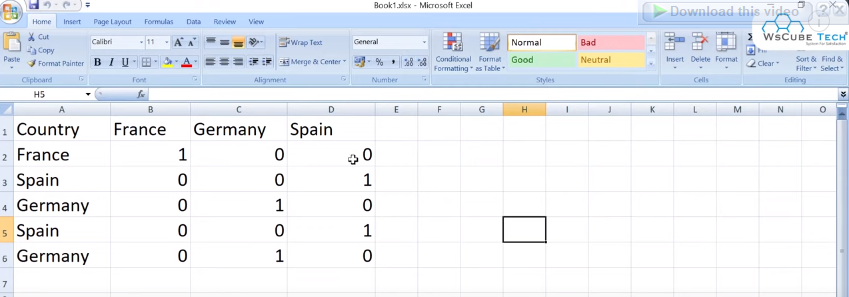
So for this we;ll use one hot encoder

In [10]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder=OneHotEncoder()
x=onehotencoder.fit_transform(dataset.Country.values.reshape(-1,1)).toarray()
x

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [12]:
label_encoder_y=LabelEncoder()
y=label_encoder_y.fit_transform(y)
y

C:\Users\Chief Oggy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 0, 0, 1, 1])

## Training and Testing DataSet:

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0) # test size means we'll test with 20 percent of the data, random state just to get same result instead of mixing up 
x_train,x_test,y_train,y_test

(array([[0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.]]),
 array([[1., 0., 0.],
        [0., 1., 0.]]),
 array([1, 0, 0, 1]),
 array([1, 0]))

# Feature Scaling:
It is used if in our dataset there is a feature that has high contrast range of magnitude. We want to keep the data at same scale. Every Column itself can be reffered as a feature. Like for data of persons there could be columns for height etc that are the features.

In [15]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)
x_test
x_train

array([[-0.57735027, -0.57735027,  1.        ],
       [-0.57735027, -0.57735027,  1.        ],
       [ 1.73205081, -0.57735027, -1.        ],
       [-0.57735027,  1.73205081, -1.        ]])

Now our data is ready. Tadow